In [1]:
#import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz

In [2]:
employee = pd.read_csv("employee_promoted.csv", encoding="iso-8859-1")
df = employee.copy()
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(),inplace=True)

In [5]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Transformation

In [6]:
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['department']=encoder.fit_transform(df['department'])
df['region']=encoder.fit_transform(df['region'])
df['education']=encoder.fit_transform(df['education'])
df['recruitment_channel']=encoder.fit_transform(df['recruitment_channel'])
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


# Visualisation

C:\Users\lakha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

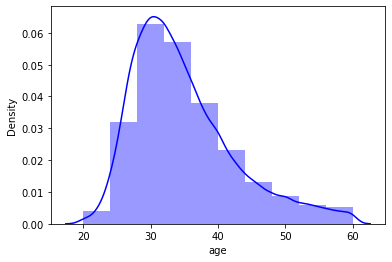

In [7]:
sns.distplot(df['age'],bins=10,hist=True,kde=True,color='blue')

C:\Users\lakha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

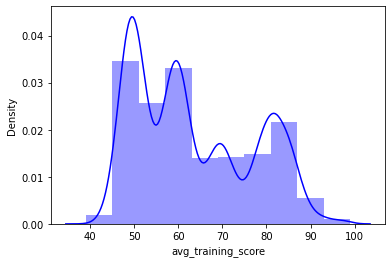

In [8]:
sns.distplot(df['avg_training_score'],bins=10,hist=True,kde=True,color='blue')

C:\Users\lakha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

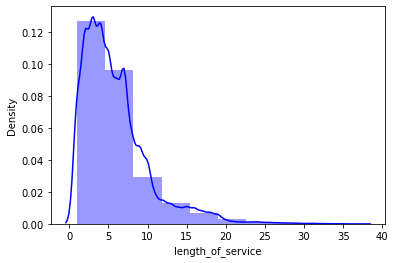

In [9]:
sns.distplot(df['length_of_service'],bins=10,hist=True,kde=True,color='blue')

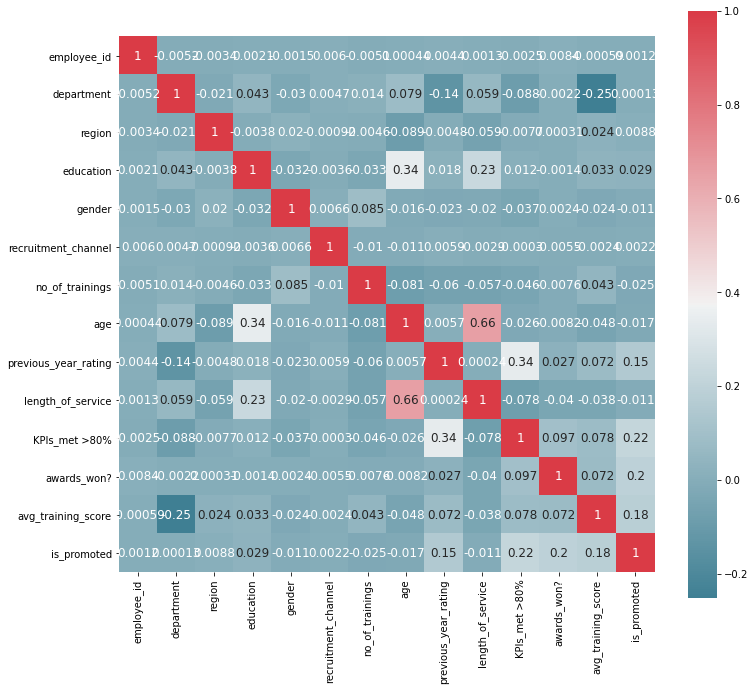

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )   

# Features selection

In [12]:
df=df[['previous_year_rating','KPIs_met >80%','avg_training_score','is_promoted']]

In [13]:
df.head()

,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted
0,5.0,1,49,0
1,5.0,0,60,0
2,3.0,0,50,0
3,1.0,0,50,0
4,3.0,0,73,0


# Logistic Regression

In [14]:
#features extraction
x=df[['previous_year_rating','KPIs_met >80%','avg_training_score']]
y=df['is_promoted']
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print('Accuracy={:2f}'.format(logreg.score(x_test,y_test)))

Accuracy=0.916290


# KNN

In [15]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.9228579769376734


In [16]:
#optimal k value
n_neighbors=30
score=[]
for k in range (1, 30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    print('Accuracy for k= ',k,'is',round(accuracy_score(y_pred,y_test),2))
    score.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k=  1 is 0.92
Accuracy for k=  2 is 0.92
Accuracy for k=  3 is 0.92
Accuracy for k=  4 is 0.92
Accuracy for k=  5 is 0.92
Accuracy for k=  6 is 0.92
Accuracy for k=  7 is 0.92
Accuracy for k=  8 is 0.92
Accuracy for k=  9 is 0.92
Accuracy for k=  10 is 0.92
Accuracy for k=  11 is 0.92
Accuracy for k=  12 is 0.92
Accuracy for k=  13 is 0.92
Accuracy for k=  14 is 0.92
Accuracy for k=  15 is 0.92
Accuracy for k=  16 is 0.92
Accuracy for k=  17 is 0.92
Accuracy for k=  18 is 0.92
Accuracy for k=  19 is 0.92
Accuracy for k=  20 is 0.92
Accuracy for k=  21 is 0.92
Accuracy for k=  22 is 0.92
Accuracy for k=  23 is 0.92
Accuracy for k=  24 is 0.92
Accuracy for k=  25 is 0.92
Accuracy for k=  26 is 0.92
Accuracy for k=  27 is 0.92
Accuracy for k=  28 is 0.92
Accuracy for k=  29 is 0.92


Text(0, 0.5, 'Testing accuracy')

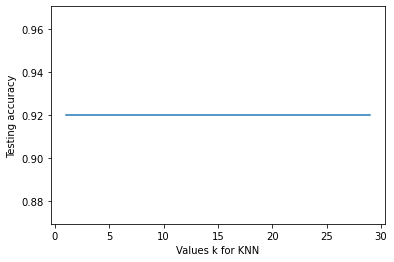

In [17]:
#graphic of optimal k value
plt.plot(range(1, 30),score)
plt.xlabel('Values k for KNN')
plt.ylabel('Testing accuracy')

# Random Forest

In [18]:
df1=RandomForestClassifier()#(n_estimator=10)
df1.fit(x_train,y_train)
y_pred=df1.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9227849948912568


# Cross validation

In [19]:
df1=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(df1,x,y, cv=5)
print('Accuracy on each fold/subset :',scores)
print('The accuracy average is ',sum(scores)/5)

Accuracy on each fold/subset : [0.92437511 0.92154716 0.92182084 0.92382082 0.92445945]
The accuracy average is  0.92320467579395


In [20]:
df.head()

,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted
0,5.0,1,49,0
1,5.0,0,60,0
2,3.0,0,50,0
3,1.0,0,50,0
4,3.0,0,73,0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
prd=pd.DataFrame(columns=x.columns)
def predict_prom():
    previous_year_rating=float(input(print("Write the previous year rating: ")))
    kpis_met=int(input(print("Is his KPIs > 80 % (1=yes or 0=no) ? ")))
    avg_training_score=int(input(print("Write the average training score: ")))
    prd.loc[-1]=[previous_year_rating,kpis_met,avg_training_score]
    y_pred=knn.predict(prd)
    if y_pred==1:
        pred="is promoted"
    elif y_pred==0:
        pred="is not promoted"
    print("I predict that this person ",pred,".")

In [23]:
predict_prom()

Write the previous year rating: 
None5
Is his KPIs > 80 % (1=yes or 0=no) ? 
None1
Write the average training score: 
None60
I predict that this person  is not promoted .
